# Milestone 2  
## Análise Exploratória de Dados (EDA) e Engenharia de Atributos

Neste notebook realizamos a análise exploratória do dataset **AI4I 2020 Predictive Maintenance**, com foco na compreensão da variável alvo, análise de correlações e avaliação da qualidade dos dados.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/afonsornfonseca/ai4i-2020-predictive-maintenance/ai4i2020.csv


In [2]:
# Substitui o texto entre aspas pelo caminho que apareceu no passo anterior
caminho = '/kaggle/input/datasets/afonsornfonseca/ai4i-2020-predictive-maintenance/ai4i2020.csv'

# Define o dataset como df
df = pd.read_csv(caminho)

# Verifica se carregou tudo (as tuas 1000+ linhas)
print(f"O dataset foi carregado com {df.shape[0]} linhas.")

# Mostra as primeiras 5 linhas
df.head()

O dataset foi carregado com 10000 linhas.


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
import pandas as pd

df = pd.read_csv(caminho)

print("--- Primeiras 5 linhas (df.head) ---")
display(df.head())

print("\n--- Informações Gerais (df.info) ---")
df.info()

print("\n--- Estatísticas Descritivas (df.describe) ---")
display(df.describe())

print("\n--- Verificação de Valores Nulos ---")
print(df.isnull().sum())

print("\n--- Verificação dos Tipos de Dados ---")
print(df.dtypes)

--- Primeiras 5 linhas (df.head) ---


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0



--- Informações Gerais (df.info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000



--- Verificação de Valores Nulos ---
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

--- Verificação dos Tipos de Dados ---
UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

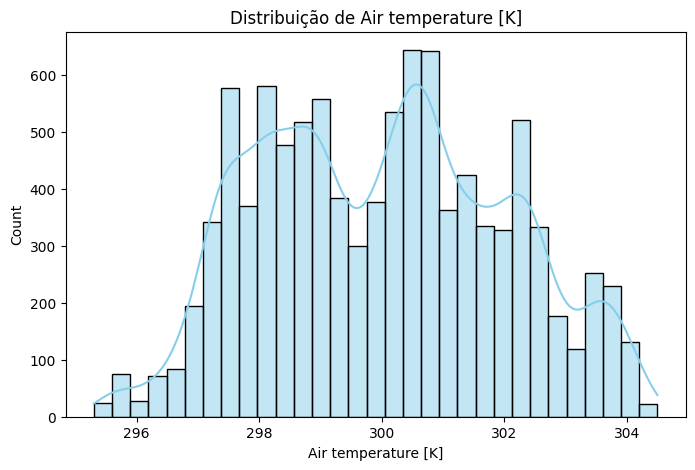

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.figure(figsize=(8, 5))
sns.histplot(df['Air temperature [K]'], kde=True, color='skyblue')
plt.title('Distribuição de Air temperature [K]')
plt.show()

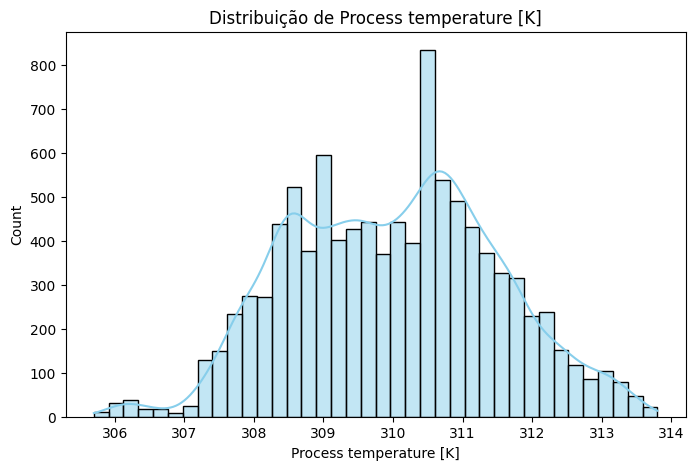

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Process temperature [K]'], kde=True, color='skyblue')
plt.title('Distribuição de Process temperature [K]')
plt.show()

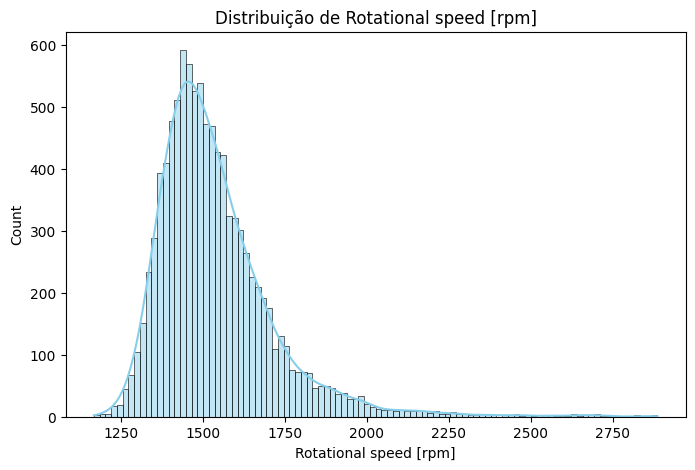

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rotational speed [rpm]'], kde=True, color='skyblue')
plt.title('Distribuição de Rotational speed [rpm]')
plt.show()

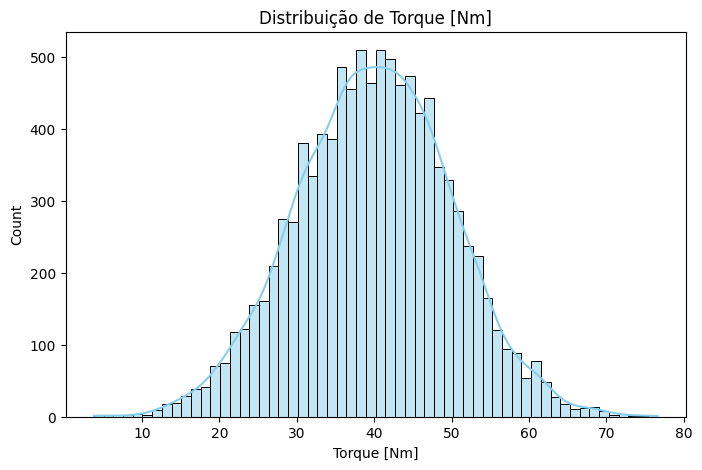

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Torque [Nm]'], kde=True, color='skyblue')
plt.title('Distribuição de Torque [Nm]')
plt.show()

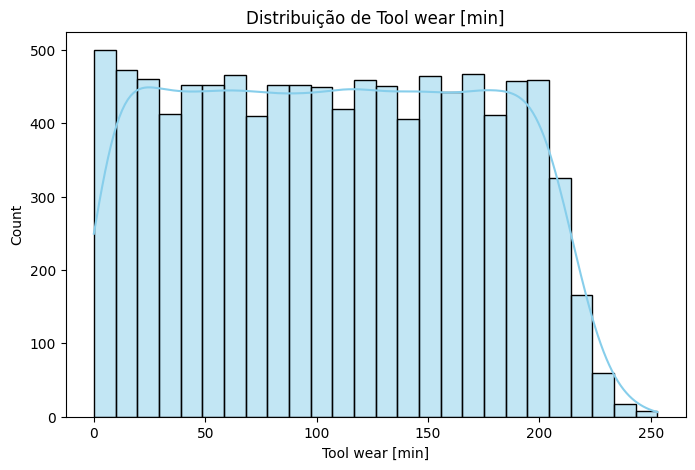

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Tool wear [min]'], kde=True, color='skyblue')
plt.title('Distribuição de Tool wear [min]')
plt.show()

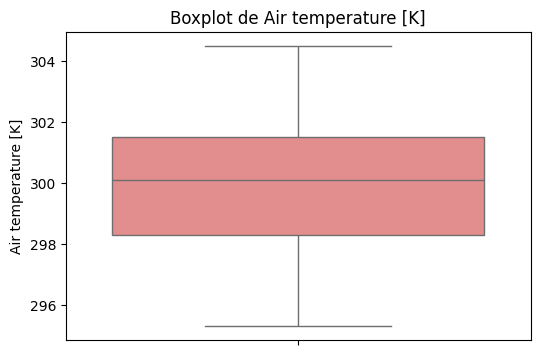

In [9]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Air temperature [K]'], color='lightcoral')
plt.title('Boxplot de Air temperature [K]')
plt.show()

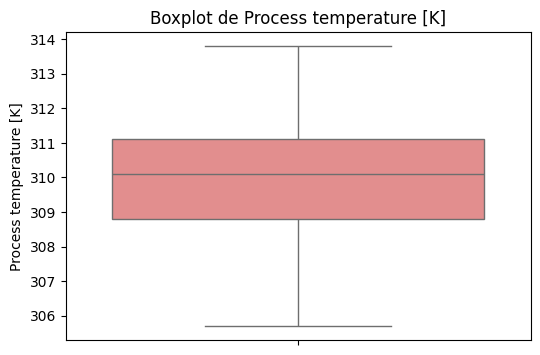

In [10]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Process temperature [K]'], color='lightcoral')
plt.title('Boxplot de Process temperature [K]')
plt.show()

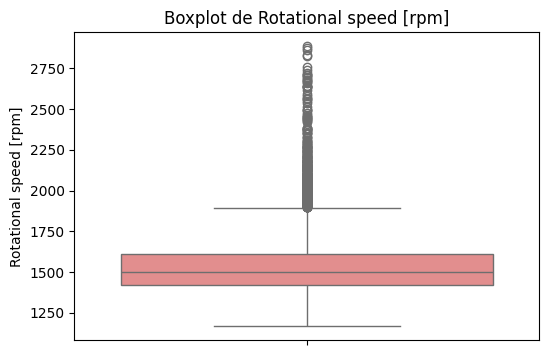

In [11]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Rotational speed [rpm]'], color='lightcoral')
plt.title('Boxplot de Rotational speed [rpm]')
plt.show()

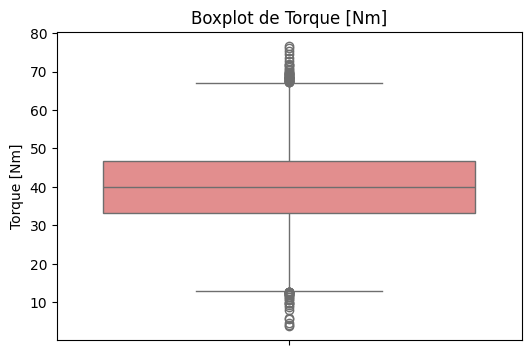

In [12]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Torque [Nm]'], color='lightcoral')
plt.title('Boxplot de Torque [Nm]')
plt.show()

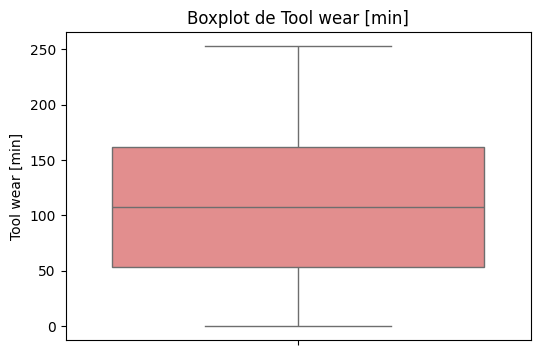

In [13]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Tool wear [min]'], color='lightcoral')
plt.title('Boxplot de Tool wear [min]')
plt.show()

Frequência da Variável 'Type'
Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


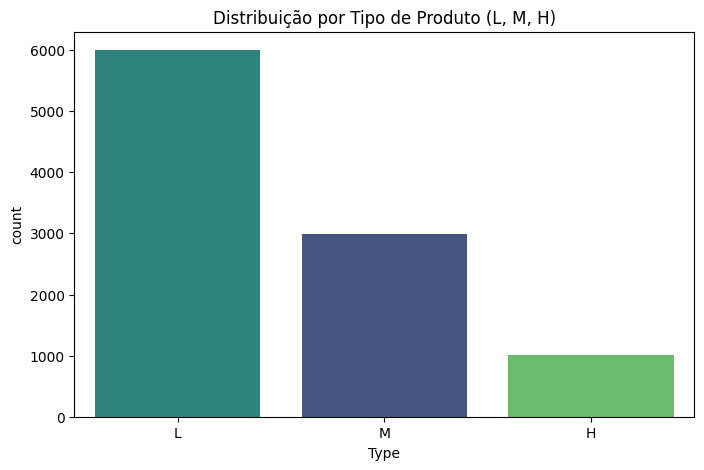

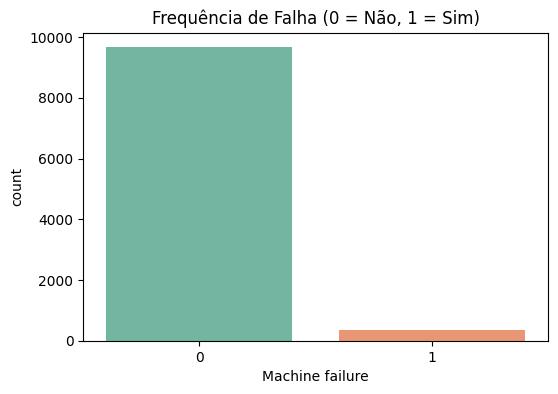

In [14]:
print("Frequência da Variável 'Type'")
print(df['Type'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(
    data=df, 
    x='Type', 
    hue='Type',           
    palette='viridis', 
    order=df['Type'].value_counts().index,
    legend=False          
)
plt.title('Distribuição por Tipo de Produto (L, M, H)')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(
    data=df, 
    x='Machine failure', 
    hue='Machine failure', 
    palette='Set2',
    legend=False           
)
plt.title('Frequência de Falha (0 = Não, 1 = Sim)')
plt.show()